# 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%run functions.ipynb
%run LDA_Example_Functions.ipynb
%matplotlib inline

ModuleNotFoundError: No module named 'spacy'

# 2. Import Newsgroups Text Data

In [41]:
# Import Dataset
features1 = featuresExtraction("../Data/secondTwitterDataFull.json")
features2 = featuresExtraction("../Data/secondTwitterData21.json")
features3 = featuresExtraction("../Data/secondTwitterData4.json")
features4 = featuresExtraction("../Data/secondTwitterData5.json")
features5 = featuresExtraction("../Data/secondTwitterDataFull9.json")
features6 = featuresExtraction("../Data/secondTwitterDataFull2.json")
features7 = featuresExtraction("../Data/secondTwitterData3.json")
features8 = featuresExtraction("../Data/secondTwitterData2.json")
features9 = featuresExtraction("../Data/secondTwitterData1.json")

In [42]:
featuresFull = np.append(features1, features2)
featuresFull = np.append(featuresFull, features3)
featuresFull = np.append(featuresFull, features4)
featuresFull = np.append(featuresFull, features5)
featuresFull= np.append(featuresFull, features6)
featuresFull = np.append(featuresFull, features7)
featuresFull = np.append(featuresFull, features8)
featuresFull = np.append(featuresFull, features9)

In [43]:
len(featuresFull)

35556

In [9]:
ex = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json)

SyntaxError: EOL while scanning string literal (<ipython-input-9-36bb5d583e07>, line 1)

'Heads up! You Can Now Get Safe #Abortion Pills Mailed to You in the United States\xa0#kavanaugh #roevwade #protectyourself #darktimesahead\n\nhttps://t.co/wUBQTYGwMG via @jezebel'

In [44]:
df.head(15)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

# 3. Remove emails and newline characters

In [13]:
# Convert to list
data = df.content.values.tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:6: Dep

In [46]:
pprint(df[:1])

array(['Heads up! You Can Now Get Safe #Abortion Pills Mailed to You in the United States\xa0#kavanaugh #roevwade #protectyourself #darktimesahead\n\nhttps://t.co/wUBQTYGwMG via @jezebel'],
      dtype='<U954')


# 4. Token and Clean-up using gensim's simple_preprocess()

In [47]:
data_words = list(sent_to_words(df))
print(data_words[:1])

[['heads', 'up', 'you', 'can', 'now', 'get', 'safe', 'abortion', 'pills', 'mailed', 'to', 'you', 'in', 'the', 'united', 'states', 'kavanaugh', 'roevwade', 'protectyourself', 'darktimesahead', 'https', 'co', 'wubqtygwmg', 'via', 'jezebel']]


# 5. Lemmatization

In [48]:
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


['head can now get safe abortion pill mail united state kavanaugh roevwade protectyourself darktimesahead https co wubqtygwmg jezebel', 'diversity be  strength love trump hate transright be human right metoo methree npcmeme condition prochoice']


# 6. Create the Document-Word matrix

In [49]:
vectorizer = CountVectorizer(analyzer='word', min_df=10, stop_words='english', lowercase = True, token_pattern='[a-zA-Z0-9]{3,}')
data_vectorized = vectorizer.fit_transform(data_lemmatized)

# 7. Check the Sparsicity

In [50]:
#materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  2.418005100985731 %


# 8. Build LDA model with sklearn

In [51]:
lda_model = LatentDirichletAllocation(n_components=20, max_iter=10, learning_method = 'online', random_state = 100, batch_size = 128, evaluate_every = -1, n_jobs = -1)
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


# 9. Diagnose model performace with perplexity and log-likelihood

In [52]:
# Log Likelihood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better, Perplexity = exp(-1 * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model paramters
pprint(lda_model.get_params())

Log Likelihood:  -82580.48368361667
Perplexity:  82.45835861587987
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'n_topics': None,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


# 10. GridSearch

In [57]:
# Define Search Param
search_params = {'n_components': [3,10,15,20,25,30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20.

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_components': [3, 10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# 11. Best topic model and its parameters

In [58]:
# Best model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Parameters: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Parameters:  {'learning_decay': 0.7, 'n_components': 3}
Best Log Likelihood Score:  -34957.1042360079
Model Perplexity:  143.5220105202665


# 12. Comparing LDA Model Peformance Scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


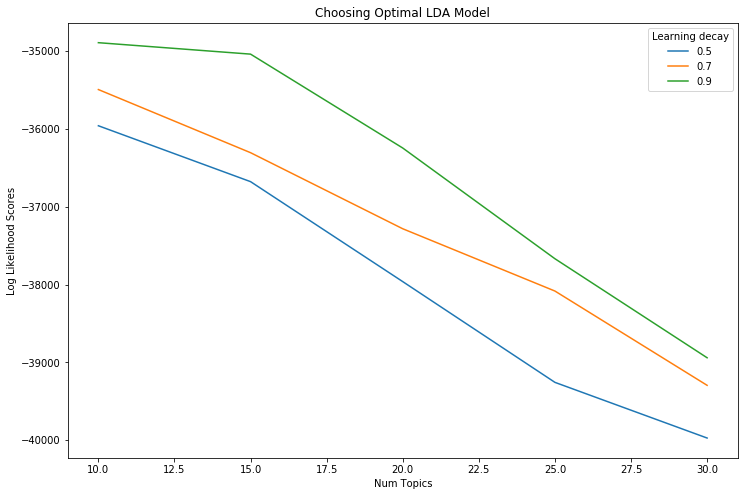

In [55]:
# Get Log Likelihoods from Grid Search Output
n_topics = [10,15,20,25,30]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay'] == 0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay'] == 0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay'] == 0.9]

# Show graph
plt.figure(figsize=(12,8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelihood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

# 13. Dominant Topic in each Document

# 14. Topics Distribution across Documents

# 15. Visualizing LDA Model

In [59]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
0      40.174115        1       1 -372.142456 -195.243271
2      35.812009        1       2 -437.769562 -443.703552
1      24.013876        1       3 -620.127258 -262.638367, topic_info=     Category        Freq            Term        Total  loglift  logprob
term                                                                    
25    Default  242.000000            baby   242.000000  30.0000  30.0000
371   Default  170.000000           state   170.000000  29.0000  29.0000
204   Default  164.000000             law   164.000000  28.0000  28.0000
305   Default  185.000000             pro   185.000000  27.0000  27.0000
227   Default  163.000000            maga   163.000000  26.0000  26.0000
218   Default  137.000000            line   137.000000  25.0000  25.0000
24    Default  129.000000           avoid   129.000000  24.0000  24.0000
124   Default  128.000000         federal   128.000000  23.0000  23.0000
86    Default  128.000000         custody   128.000000  22.0000  22.0000
8     Default  128.000000  administration   128.000000  21.0000  21.0000
381   Default  128.000000         teenage   128.000000  20.0000  20.0000
394   Default  127.000000       transport   127.000000  19.0000  19.0000
277   Default  127.000000        parental   127.000000  18.0000  18.0000
118   Default  127.000000      facilitate   127.000000  17.0000  17.0000
180   Default  127.000000     involvement   127.000000  16.0000  16.0000
214   Default  257.000000            life   257.000000  15.0000  15.0000
160   Default  113.000000          health   113.000000  14.0000  14.0000
342   Default   77.000000       sacrament    77.000000  13.0000  13.0000
2     Default   76.000000      absolutely    76.000000  12.0000  12.0000
0     Default   73.000000         aborted    73.000000  11.0000  11.0000
413   Default  118.000000            vote   118.000000  10.0000  10.0000
157   Default   70.000000          hauler    70.000000   9.0000   9.0000
176   Default   70.000000          ikphkk    70.000000   8.0000   8.0000
440   Default   70.000000      xsbaldkfrt    70.000000   7.0000   7.0000
49    Default   70.000000            burn    70.000000   6.0000   6.0000
139   Default   70.000000        generate    70.000000   5.0000   5.0000
360   Default   70.000000          sicken    70.000000   4.0000   4.0000
421   Default   70.000000           waste    70.000000   3.0000   3.0000
106   Default   70.000000     electricity    70.000000   2.0000   2.0000
406   Default   99.000000            uqdl    99.000000   1.0000   1.0000
...       ...         ...             ...          ...      ...      ...
360    Topic3   69.958092          sicken    70.611067   1.4172  -4.1627
421    Topic3   69.958090           waste    70.611079   1.4172  -4.1627
106    Topic3   69.958031     electricity    70.611095   1.4172  -4.1627
243    Topic3   67.209558             mom    67.881007   1.4166  -4.2028
82     Topic3   64.809768        contract    65.466543   1.4165  -4.2391
343    Topic3   64.807230             sad    65.466425   1.4164  -4.2392
122    Topic3   63.769734           fatal    64.424501   1.4163  -4.2553
340    Topic3   63.769431        ruczgkjk    64.424416   1.4163  -4.2553
420    Topic3   63.769400            warn    64.424534   1.4163  -4.2553
255    Topic3   63.769368         newborn    64.424552   1.4163  -4.2553
199    Topic3   63.769277            kiss    64.424522   1.4163  -4.2553
165    Topic3   63.769152           herpe    64.424491   1.4163  -4.2553
412    Topic3   63.769215           virus    64.424559   1.4163  -4.2553
183    Topic3   40.208317             isn    40.879629   1.4100  -4.7165
353    Topic3   39.839062          searcy    40.506261   1.4099  -4.7257
432    Topic3   37.956587         wmqhbab    38.609871   1.4095  -4.7742
21     Topic3   37.956412       arguement    38.609878   1.4095  -4.7742
223    Topic3   3